<a href="https://colab.research.google.com/github/manujsinghwal/insights-from-uber-supply-and-demand-data/blob/main/insights_from_uber_supply_and_demand_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Insights From Uber Supply And Demand Data
Dataset: [uber.csv](https://drive.google.com/file/d/1eh_gE-4NdmYNbmxGAuiJ0B_ibURtoWwe/view?usp=sharing)

Using the provided dataset, answer the following asked questions.

In [1]:
# Mounting Google drive as 'uber.csv' file stored in a drive directory
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Data Exploration
Before diving into questions, first, let's analyze the dataset through some visualizations. Let's start with importing commonly used libraries.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import cycle, islice

In [3]:
# Reading .csv file from Google drive directory
df = pd.read_csv('gdrive/My Drive/Colab Notebooks/Dataset/uber.csv')

In [4]:
# First five records of datasets
df.head()

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,10-Sep-12,7,5,0,2,2,9
1,NaN,8,6,0,2,2,14
2,NaN,9,8,3,0,0,14
3,NaN,10,9,2,0,1,14
4,NaN,11,11,1,4,4,11


In [5]:
# Renaming columns
df.columns = [c.replace(' ', '') for c in df.columns]

In [6]:
# Some basic info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            15 non-null     object
 1   Time(Local)     336 non-null    int64 
 2   Eyeballs        336 non-null    int64 
 3   Zeroes          336 non-null    int64 
 4   CompletedTrips  336 non-null    int64 
 5   Requests        336 non-null    int64 
 6   UniqueDrivers   336 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 18.5+ KB


As, we can see in the above cell's output, we have null values only in the `Date` column. If they are null continuously until the starting of the next day, we can use the forward fill method which replaces the NULL values with the value from the previous row.

In [7]:
df.head(18)

,Date,Time(Local),Eyeballs,Zeroes,CompletedTrips,Requests,UniqueDrivers
0,10-Sep-12,7,5,0,2,2,9
1,NaN,8,6,0,2,2,14
2,NaN,9,8,3,0,0,14
3,NaN,10,9,2,0,1,14
4,NaN,11,11,1,4,4,11
5,NaN,12,12,0,2,2,11
6,NaN,13,9,1,0,0,9
7,NaN,14,12,1,0,0,9
8,NaN,15,11,2,1,2,7
9,NaN,16,11,2,3,4,6


Hence, our instinct was correct. Let's fill non-values using the forward fill method.

In [8]:
# Using forward fill method to fill NaN values with the value of previous row
df = df.fillna(method='ffill')
df

,Date,Time(Local),Eyeballs,Zeroes,CompletedTrips,Requests,UniqueDrivers
0,10-Sep-12,7,5,0,2,2,9
1,10-Sep-12,8,6,0,2,2,14
2,10-Sep-12,9,8,3,0,0,14
3,10-Sep-12,10,9,2,0,1,14
4,10-Sep-12,11,11,1,4,4,11
...,...,...,...,...,...,...,...
331,24-Sep-12,2,3,3,0,2,0
332,24-Sep-12,3,3,3,0,1,0
333,24-Sep-12,4,1,1,0,0,0
334,24-Sep-12,5,4,2,1,1,3


In [9]:
# Now checking the current DataFrame info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            336 non-null    object
 1   Time(Local)     336 non-null    int64 
 2   Eyeballs        336 non-null    int64 
 3   Zeroes          336 non-null    int64 
 4   CompletedTrips  336 non-null    int64 
 5   Requests        336 non-null    int64 
 6   UniqueDrivers   336 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 18.5+ KB


Now, we have the dataset without non-null values. Another thing that could be useful in the question part is creating timestamps with given date and time values. Let's create a timestamp column by using f-strings.

In [10]:
# Defining a function to create a new column for timestamp
def create_timestamp(date, time):
  return pd.to_datetime(f"{date} {time}:00:00")

# Applying function for each row
df['Timestamp'] = df.apply(lambda row: create_timestamp(row['Date'], row['Time(Local)']), axis=1)
df.head()

,Date,Time(Local),Eyeballs,Zeroes,CompletedTrips,Requests,UniqueDrivers,Timestamp
0,10-Sep-12,7,5,0,2,2,9,2012-09-10 07:00:00
1,10-Sep-12,8,6,0,2,2,14,2012-09-10 08:00:00
2,10-Sep-12,9,8,3,0,0,14,2012-09-10 09:00:00
3,10-Sep-12,10,9,2,0,1,14,2012-09-10 10:00:00
4,10-Sep-12,11,11,1,4,4,11,2012-09-10 11:00:00


## Data Explanation
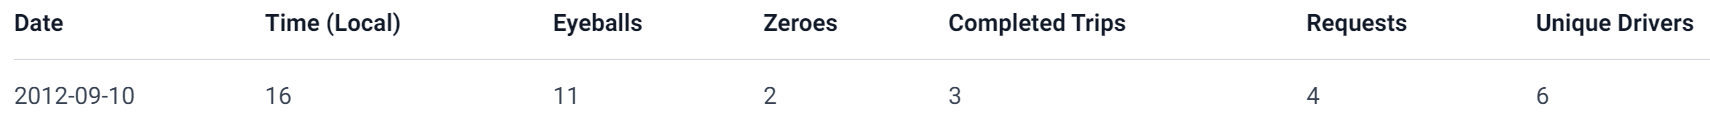
\
This means that during the hour beginning at 4pm (hour 16), on September 10th, 2012, 11 people opened the Uber app (Eyeballs). 2 of them did not see any car (Zeroes) and 4 of them requested a car (Requests). Of the 4 requests, only 3 complete trips actually resulted (Completed Trips). During this time, there were a total of 6 drivers who logged in (Unique Drivers).
\
\
It seems that, dataset is in good shape to analyze further questions. Next, we will do some visualization with the given dataset to explore more of the given overview for the dataset. We expect to see lots of eyeballs compared to other columns since some of them will be converted to zeroes, requests and completed trips. Let's plot these values with dates and see if is there any relation between them.



In [11]:
# Setting up the figure size for further visualizations
plt.rcParams["figure.figsize"] = (10,6)

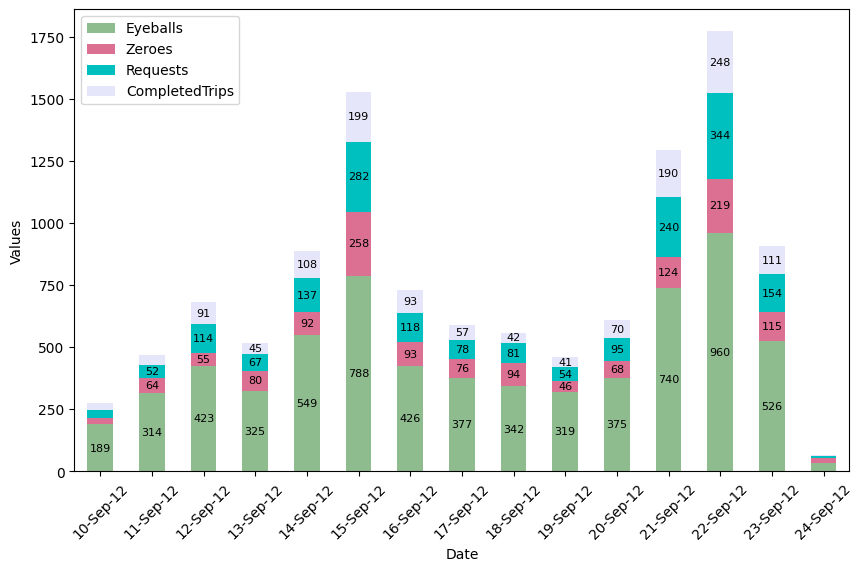

In [12]:
# Defining the color pallete
color_pallete = list(islice(cycle(['darkseagreen', 'palevioletred', 'c', 'lavender']), None, len(df)))

ax1 = (
      df[['Date', 'Eyeballs', 'Zeroes', 'Requests', 'CompletedTrips']]
      .groupby('Date')
      .sum()
      .reset_index()
      .plot(kind='bar', stacked=True, x='Date', color=color_pallete)
    )

# Annotating on the bars
for c in ax1.containers:
    # If the segment is small or 0, we can customize the labels
    labels = []
    for v in c:
        if v.get_height() > 40:
            labels.append(int(v.get_height()))
        else:
            labels.append('')

    ax1.bar_label(c, labels=labels, label_type='center', fontsize=8)

plt.ylabel("Values")
plt.xticks(rotation=45)
plt.show()

The values against the date plot seem to kind of have weekly seasonality. Now, we can check it by plotting against weekdays. For this purpose, we will use the `.weekday` attribute of pandas which will return an integer representing the corresponding weekday. We will aggregate and sum all values based on whether it falls under which weekday and plot.

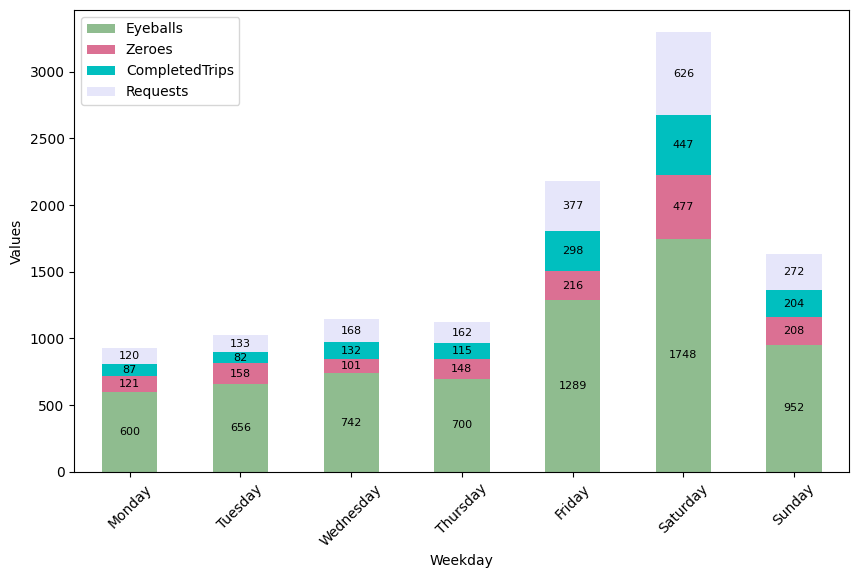

In [27]:
# Adding a new column for Weekday
df['Weekday'] = df['Timestamp'].dt.weekday

df_weekday = (
    df[['Weekday', 'Eyeballs', 'Zeroes', 'CompletedTrips', 'Requests']]
    .groupby('Weekday')
    .sum()
    .reset_index()
)

day_of_week={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df_weekday['Weekday'] = df_weekday['Weekday'].map(day_of_week)

ax2 = df_weekday.plot(kind='bar', stacked=True, x='Weekday', color=color_pallete)

# Annotating on the bars
for c in ax2.containers:
    # If the segment is small or 0, we can customize the labels
    labels = []
    for v in c:
        if v.get_height() > 40:
            labels.append(int(v.get_height()))
        else:
            labels.append('')

    ax2.bar_label(c, labels=labels, label_type='center', fontsize=8)

plt.ylabel("Values")
plt.xticks(rotation=45)
plt.show()

According to our 15 days data, Saturdays are the busiest. Let's see the aggregated results by the hour.

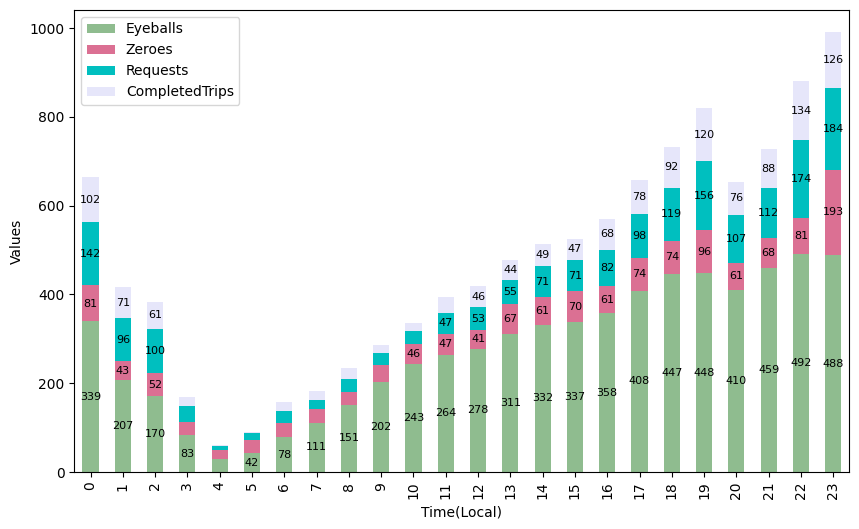

In [28]:
ax3 = (
      df[['Time(Local)', 'Eyeballs', 'Zeroes', 'Requests', 'CompletedTrips']]
      .groupby('Time(Local)')
      .sum()
      .reset_index()
      .plot(kind='bar', stacked=True, x='Time(Local)', color=color_pallete)
    )

# Annotating on the bars
for c in ax3.containers:
    # If the segment is small or 0, we can customize the labels
    labels = []
    for v in c:
        if v.get_height() > 40:
            labels.append(int(v.get_height()))
        else:
            labels.append('')

    ax3.bar_label(c, labels=labels, label_type='center', fontsize=8)

plt.ylabel("Values")
plt.show()

The busiest hour of the day is between 23 and midnight based on the above plot. Also, the least traffic on the app occurred on 4 am, which is logical. Let's also observe the unique drivers' distribution aggregated on weekdays and hours as next plots.

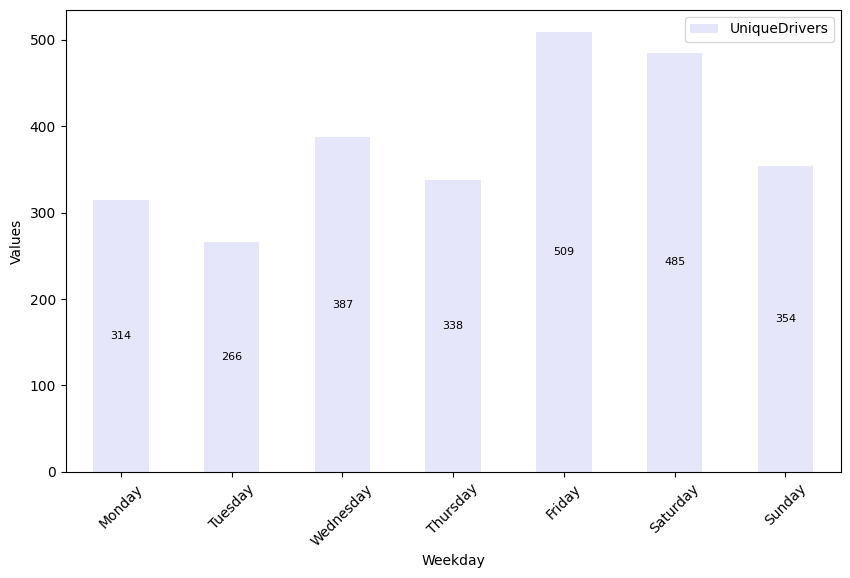

In [29]:
df_weekday_drivers = (
    df[['Weekday','UniqueDrivers']]
    .groupby('Weekday')
    .sum()
    .reset_index()
)

day_of_week={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df_weekday_drivers['Weekday'] = df_weekday_drivers['Weekday'].map(day_of_week)

ax4 = (
      df_weekday_drivers
      .plot(kind='bar', x='Weekday', color='lavender')
    )

# Annotating on the bars
for c in ax4.containers:
    # If the segment is small or 0, we can customize the labels
    labels = []
    for v in c:
        if v.get_height() > 40:
            labels.append(int(v.get_height()))
        else:
            labels.append('')

    ax4.bar_label(c, labels=labels, label_type='center', fontsize=8)

plt.ylabel("Values")
plt.xticks(rotation=45)
plt.show()

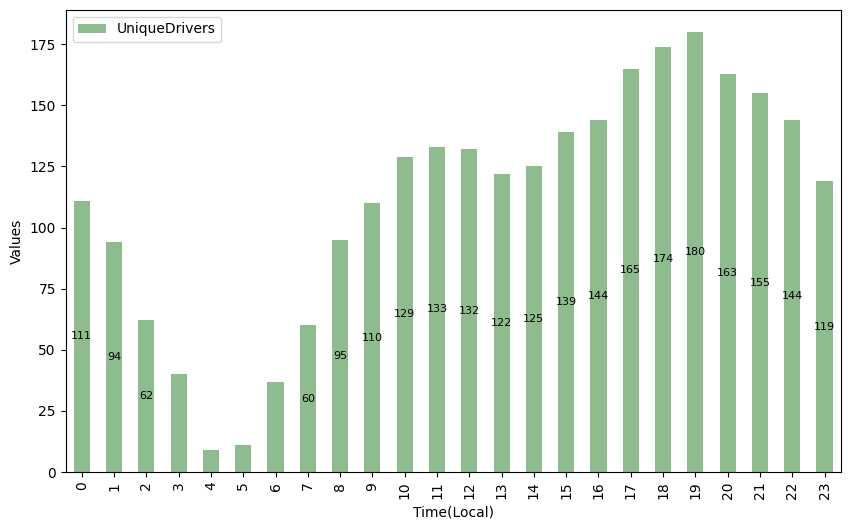

In [30]:
ax5 = (
      df[['Time(Local)', 'UniqueDrivers']]
      .groupby('Time(Local)')
      .sum()
      .reset_index()
      .plot(kind='bar', x='Time(Local)', color='darkseagreen')
    )

# Annotating on the bars
for c in ax5.containers:
    # If the segment is small or 0, we can customize the labels
    labels = []
    for v in c:
        if v.get_height() > 40:
            labels.append(int(v.get_height()))
        else:
            labels.append('')

    ax5.bar_label(c, labels=labels, label_type='center', fontsize=8)

plt.ylabel("Values")
plt.show()

It's aligned with what we observed in demand (Eyeballs, Requests etc.) plots. Okay, we can move forward to questions now.

### Question 1
**Which date had the most completed trips during the two week period?**

In [17]:
most_completed_trips = (
    df
    .groupby('Date')['CompletedTrips']
    .sum()
    .reset_index()
    .query('CompletedTrips == CompletedTrips.max()')
    .reset_index(drop=True)
)

print('Most completed trips on:\n')
print(most_completed_trips)

Most completed trips on:

        Date  CompletedTrips
0  22-Sep-12             248


### Question 2
**Which hour of the day had the most requests during the two week period?**

In [18]:
# Calculating the most busy hour for Requests
most_requests = (
    df
    .groupby('Time(Local)')['Requests']
    .sum()
    .reset_index()
    .sort_values(by='Requests', ascending=False)
    .head(1)
    .reset_index(drop=True)
    )

print('The most busy hour for Requests:\n')
print(most_requests)

The most busy hour for Requests:

   Time(Local)  Requests
0           23       184


### Question 3
**What percentages of all Zeroes during the two week period occurred on weekend (Friday at 5 pm to Sunday at 3 am)?**

In [19]:
# Calculating the Zeroes during weekend
weekend_zeroes = (
    df
    .query('(Weekday == 4 & `Time(Local)` >= 17) | (Weekday == 5) | (Weekday == 6 & `Time(Local)` < 3)')['Zeroes']
    .sum()
)

weekend_zeroes_pct = weekend_zeroes * 100.0 / df['Zeroes'].sum()
print(f'{weekend_zeroes_pct:.2f}%')

44.86%


### Question 4
**What is the weighted average ratio of completed trips per driver during the two week period?**

**Weighted Average:**
\
Formally, the weighted average of a non-empty tuple of data (x1, x2,..., xn), with corresponding non-negative weights (w1, w2,..., wn) is
\
\
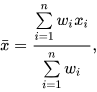
\
\
which expands to:
\
\
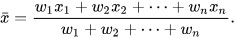

In [20]:
# Dropping records if we don't have any UniqueDrivers
df_with_drivers = (
    df
    .query('UniqueDrivers > 0')
    .copy()
)

# Calculating CompletedTripsPerDriver ratio
df_with_drivers['CompletedTripsPerDriver'] = df_with_drivers['CompletedTrips'] / df_with_drivers['UniqueDrivers']

# Calculating weighted average
weighted_average = np.average(df_with_drivers['CompletedTripsPerDriver'], weights=df_with_drivers['CompletedTrips'])
print('Weighted average:',f'{weighted_average:.2f}')

# Calculating average: It's not same as weighted average
average = np.average(df_with_drivers['CompletedTripsPerDriver'])
print('Average:', f'{average:.2f}')

Weighted average: 0.83
Average: 0.47


### Question 5
**True or False: Driver supply always increases when demand increases during the two week period.**

In [21]:
# Checking if driver supply increases when demand increases
demand_supply = df[['Timestamp', 'Requests', 'UniqueDrivers']].copy()

# Calculating the difference between consecutive elements
demand_supply['RequestDiff'] = demand_supply['Requests'].diff()
demand_supply['SupplyDiff'] = demand_supply['UniqueDrivers'].diff()

# Filtering the dataset where demand always increased
demand_supply = (
    demand_supply
    .query('RequestDiff > 0')
    )

# Checking if Requests and UniqueDrivers increases simultaneously
increase_supply = (demand_supply['SupplyDiff'] > 0)

# all() function checks if the supply of drivers increase in each of demand of requests increase
increase_supply.all()

False

Hence, the demand for uber requests does not guranatee an increase in the supply of drivers. Let's also check it by using a plot.

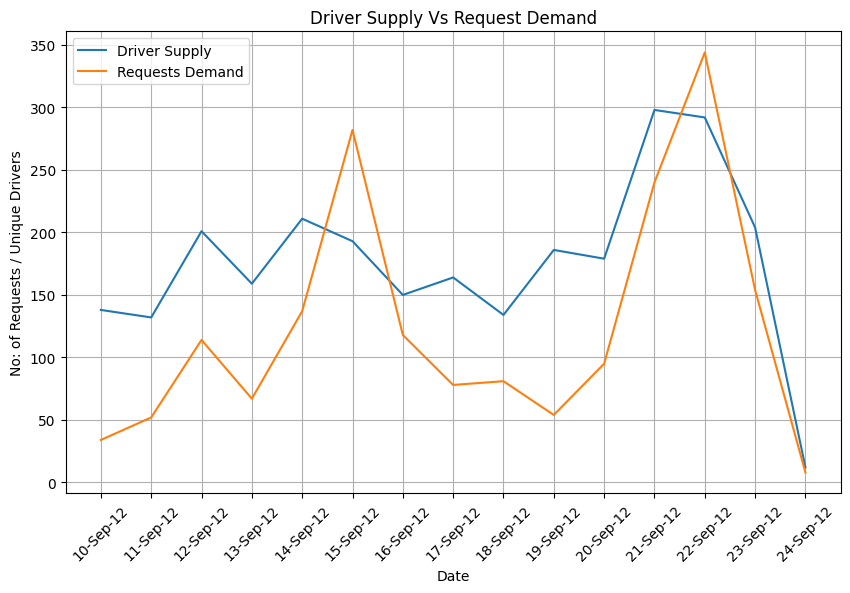

In [22]:
# Aggregating the data
demand_supply_agg = (
    df
    .groupby('Date')
    .agg(
        Requests = ('Requests','sum'),
        UniqueDrivers = ('UniqueDrivers','sum')
    )
    .reset_index()
)

# Plot the driver supply on each day
plt.plot(demand_supply_agg['Date'], demand_supply_agg['UniqueDrivers'], label = 'Driver Supply')

# Plot the requests demand on each day
plt.plot(demand_supply_agg['Date'], demand_supply_agg['Requests'], label = 'Requests Demand')

plt.xlabel('Date')
plt.ylabel('No: of Requests / Unique Drivers')
plt.grid(True)
plt.legend()
plt.title('Driver Supply Vs Request Demand')
plt.xticks(demand_supply_agg['Date'], rotation=45)
plt.show()

**Data Interpretation:** From the above line chart we can understand that driver supply was not always increase as the demand increase. There might be various reasons for this, some drivers might choose not to work during peak demand times, or there might be external factors that affect driver availability (such as traffic, weather conditions, or events in the city). To confirm this, we would need to analyze the data and identify instances where demand increased but driver supply did not.

### Question 6
**If you could add 5 drivers to any single hour of every day during the two week period, which hour should you add them to?**
\
**Hint:** Consider both rider eyeballs and driver supply when choosing
\
By using the given hint, we can understand we have to consider eyeballs as demand. As logically, we would decide to add 5 extra drivers to the busiest hour of the day with the highest eyeballs but lowest drivers. We can aggregate our dataset by a given `Time(Local)` column and then find the largest ratio.

In [23]:
add_drivers = (
    df
    .groupby('Time(Local)')
    .agg(
        Eyeballs = ('Eyeballs','sum'),
        UniqueDrivers = ('UniqueDrivers','sum')
    )
    .reset_index()
)

# Calculating the Ratio for eyeballs to unique drivers
add_drivers['Ratio'] = add_drivers['Eyeballs'] / add_drivers['UniqueDrivers']

# Filtering the max ratio
result = (
    add_drivers
    .query('Ratio == Ratio.max()')['Time(Local)']
    .reset_index(drop=True)
)

print('At',result[0],'hour we can add 5 drivers every day during this two week period as the ratio for eyeballs to unique drivers is high at this time.')

At 23 hour we can add 5 drivers every day during this two week period as the ratio for eyeballs to unique drivers is high at this time.


### Question 7
**True or False: There is exactly two weeks of data in this analysis.**

In [24]:
# Conveting data type
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')
date_diff = df['Date'].max() - df['Date'].min()
date_diff

Timedelta('14 days 00:00:00')

True, there is exactly two weeks of data in this analysis.

### Question 8
**Looking at the data from all two weeks, which time might make the most sense to consider a true "end day" instead of midnight? (i.e when are supply and demand at both their natural minimums)**
\
**Tip:** Visualize the data to confirm your answer if needed.


In [25]:
# Calculating average demand and supply for every hour
end_of_day = (
    df
    .groupby('Time(Local)')
    .agg(
        AvgDemand = ('Requests','mean'),
        AvgSupply = ('UniqueDrivers','mean')
    )
    .reset_index()
)

end_of_day

,Time(Local),AvgDemand,AvgSupply
0,0,10.142857,7.928571
1,1,6.857143,6.714286
2,2,7.142857,4.428571
3,3,2.500000,2.857143
4,4,0.642857,0.642857
5,5,1.000000,0.785714
6,6,2.000000,2.642857
7,7,1.571429,4.285714
8,8,2.071429,6.785714
9,9,1.857143,7.857143


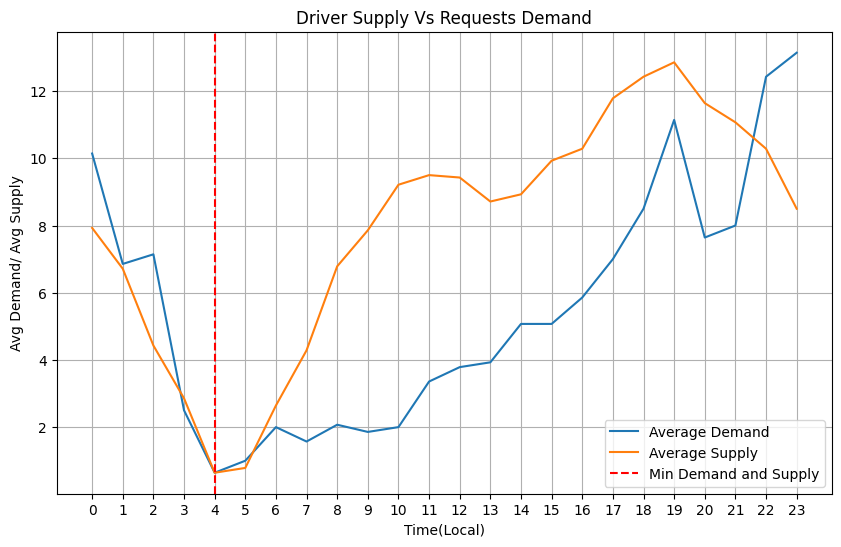

In [26]:
# Plotting the avg driver demand on each day
plt.plot(end_of_day['Time(Local)'], end_of_day['AvgDemand'], label='Average Demand')

# Plotting the avg supply on each day
plt.plot(end_of_day['Time(Local)'], end_of_day['AvgSupply'], label='Average Supply')

# Find the index of the minimum demand and supply
min_demand_index = end_of_day['AvgDemand'].idxmin()
min_supply_index = end_of_day['AvgSupply'].idxmin()

# Plot vertical lines at the minimum demand and supply points
if min_demand_index == min_supply_index:
  plt.axvline(x=end_of_day['Time(Local)'].iloc[min_demand_index], color='red', linestyle='--', label='Min Demand and Supply')
else:
  plt.axvline(x=end_of_day['Time(Local)'].iloc[min_demand_index], color='red', linestyle='--', label='Min Demand')
  plt.axvline(x=end_of_day['Time(Local)'].iloc[min_supply_index], color='red', linestyle='--', label='Min Supply')

plt.xlabel('Time(Local)')
plt.ylabel('Avg Demand/ Avg Supply')
plt.grid(True)
plt.legend()
plt.title('Driver Supply Vs Requests Demand')

# Set x-axis ticks to show all time values
plt.xticks(end_of_day['Time(Local)'])
plt.show()


**Data Interpretation:** From the above line graph we can consider 4 AM as the true "End Day" instead of midnight.